In [1]:
#import library yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock = yf.Ticker('TSLA') #Put inside the parenthesis the ticker you want to analyze
stockinfo = stock.info
#To have a cleaner view of the information you are extracting uncomment the next lines
# for line in stockinfo.items():
#     print(':', line)

Lets see how much the stock value have grow over time

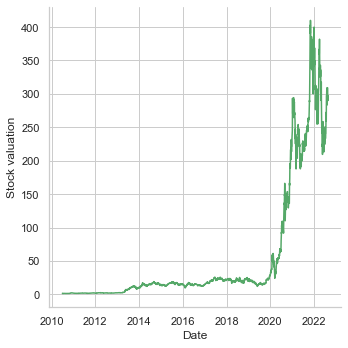

In [3]:
stock_grow = pd.DataFrame(stock.history(period='max').Close) 
stock_grow = stock_grow.rename(columns={'Close':'Stock valuation'})

#Plotting
sns.set_theme(style='whitegrid')
sns.set_context = 'poster'
sns.relplot(x='Date', y='Stock valuation', data = stock_grow, kind='line', color = 'g')
plt.show()

Looks like the stock valuation increased considerably in the last two years, let´s see the stock recommendations for that period of time

In [8]:
df = stock.recommendations
df['Year'] = ''
df = df.loc['2020':]
for i in df:
    df.loc['2020','Year'] = '2020'
for i in df:
    df.loc['2021','Year'] = '2021'
for i in df:
    df.loc['2022','Year'] = '2022'

df = df.rename(columns = {'To Grade':'Recommendation'})
reco = df[df['Recommendation'].isin(['Sell', 'Underperform', 'Hold', 'Outperform', 'Buy'])]
recommendations = reco.groupby('Year')['Recommendation'].value_counts()
recommendations

Year  Recommendation
2020  Buy               19
      Hold              14
      Underperform      13
      Outperform        11
      Sell              11
2021  Buy               22
      Outperform         6
      Hold               2
      Sell               1
      Underperform       1
2022  Buy               11
      Outperform         9
      Hold               4
      Sell               4
Name: Recommendation, dtype: int64

Now let´s check the distribution of stock share holders

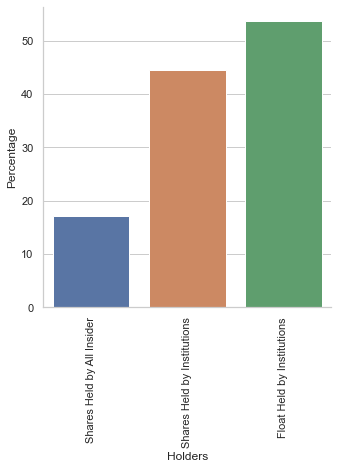

In [5]:
holders = stock.major_holders
holders = holders.rename(columns={0:'Percentage', 1:'Holders'})
holders = holders[holders['Holders'] != 'Number of Institutions Holding Shares']
holders['Holders'] = holders['Holders'].str.replace('% of ', '')
holders['Percentage'] = holders['Percentage'].str.replace('%', '').astype(float)

#Plotting
sns.set_theme(style='whitegrid')
sns.set_context = 'poster'
sns.catplot(x='Holders', y='Percentage', data=holders, kind='bar')
plt.xticks(rotation=90)
plt.show()

Finally, let´s see how many shares and stock value does each Institution has

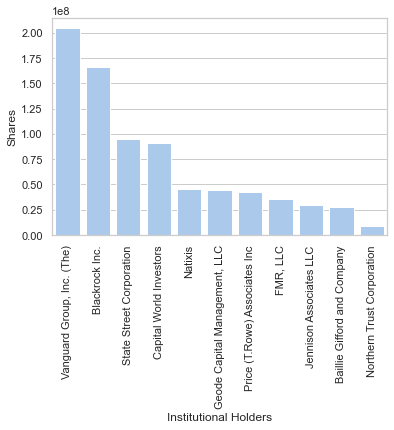

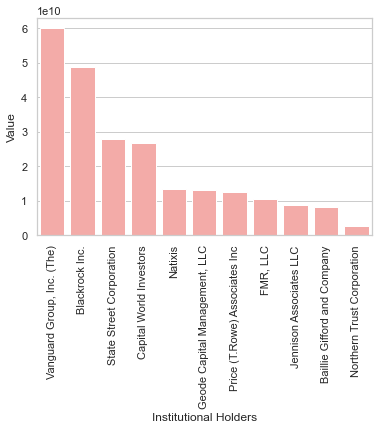

In [6]:
inst_holders = stock.institutional_holders
inst_holders = inst_holders[['Holder', 'Shares', 'Value']]
inst_holders = inst_holders.rename(columns={'Holder':'Institutional Holders'})

#Plotting
sns.set_theme(style='whitegrid')
sns.set_context = 'poster'
sns.set_color_codes('pastel')
sns.barplot(x='Institutional Holders', y='Shares', data=inst_holders, color = 'b')
plt.xticks(rotation=90)
plt.show()
sns.barplot(x='Institutional Holders', y='Value', data=inst_holders, color = 'r')
plt.xticks(rotation=90)
plt.show()